In [1]:
import gudhi as gd
print(gd.__version__)

3.6.0


In [2]:
from sklearn import datasets
circles, labels = datasets.make_circles(n_samples=100, noise=0.06, factor=0.5)
print('Data dimension:{}'.format(circles.shape))

Data dimension:(100, 2)


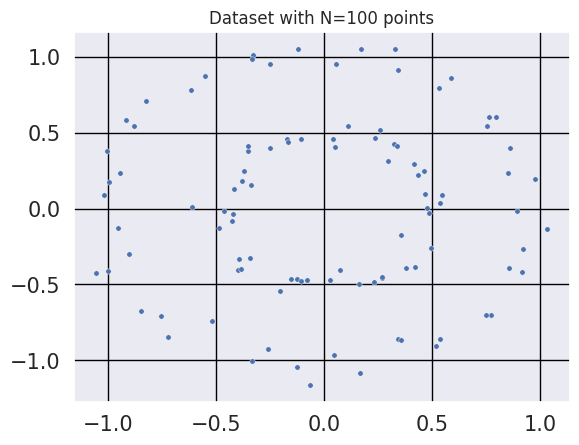

In [3]:
import matplotlib.pyplot as plt; 
import seaborn as sns
sns.set()

fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.scatterplot(x=circles[:,0], y=circles[:,1],   s=15)
plt.title('Dataset with N=%s points'%(circles.shape[0]))
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('circles2.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [4]:
%%time
# The RipsComplex() function creates a one skeleton graph from the point cloud.
Rips_complex = gd.RipsComplex(circles, max_edge_length=0.6) 

CPU times: user 174 µs, sys: 0 ns, total: 174 µs
Wall time: 178 µs


In [5]:
%%time
# The create_simplex_tree() method creates the filtered complex.
Rips_simplex_tree = Rips_complex.create_simplex_tree(max_dimension=3) 

CPU times: user 1.11 ms, sys: 0 ns, total: 1.11 ms
Wall time: 673 µs


In [6]:
%%time
# The get_filtration() method computes the simplices of the filtration
filt_Rips = list(Rips_simplex_tree.get_filtration())

CPU times: user 8.02 ms, sys: 0 ns, total: 8.02 ms
Wall time: 8.06 ms


In [7]:
import numpy as np

eps = 0.15
triangles = np.array([s[0] for s in Rips_simplex_tree.get_skeleton(2) if len(s[0])==3 and s[1] <= eps])

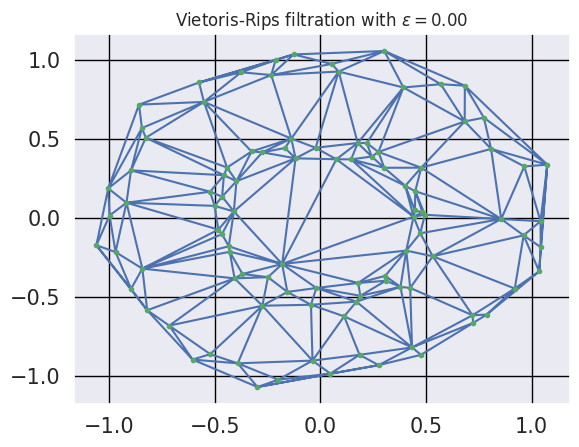

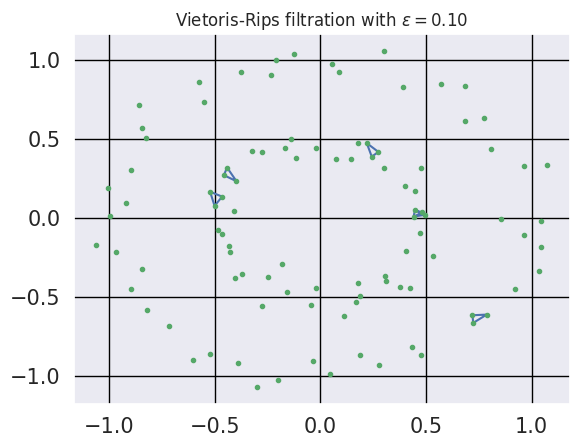

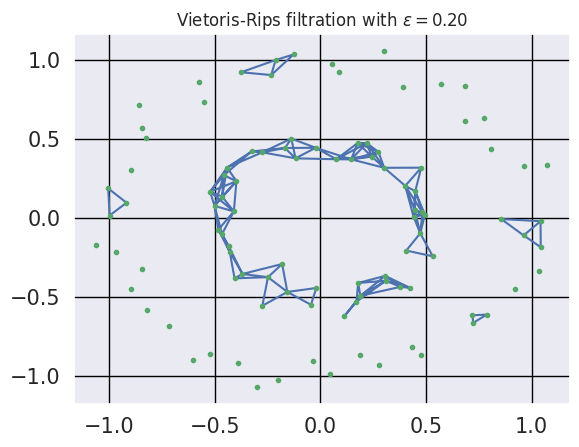

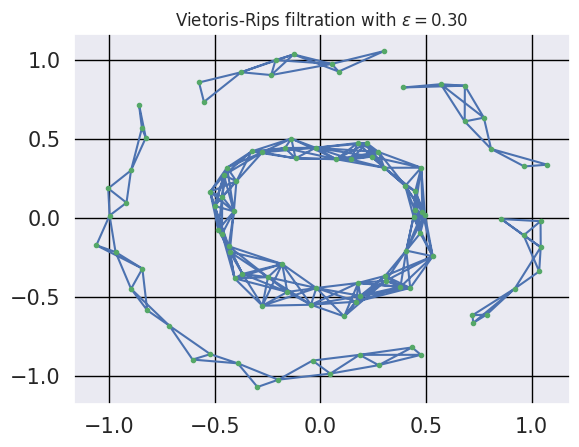

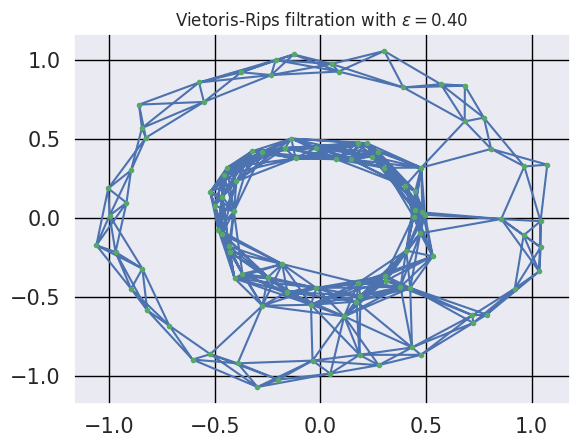

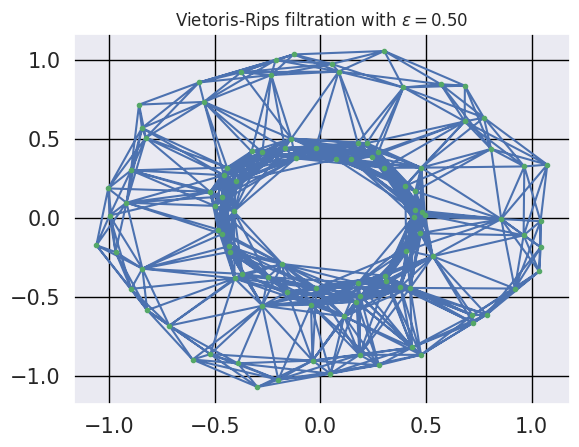

In [9]:
for eps in np.linspace(0, 0.5, 6):

    triangles = np.array([s[0] for s in Rips_simplex_tree.get_skeleton(2) if len(s[0])==3 and s[1] <= eps])
    plt.triplot(circles[:,0], circles[:,1], triangles)
    plt.plot(circles[:,0], circles[:,1], '.')
    plt.title(f"Vietoris-Rips filtration with $\epsilon={eps:.2f}$")
    plt.grid(color = 'black', linestyle = '-', linewidth = 1)
    plt.savefig(f'filtration{int(eps*100):03}.png' , dpi=600, transparent=True)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.show()


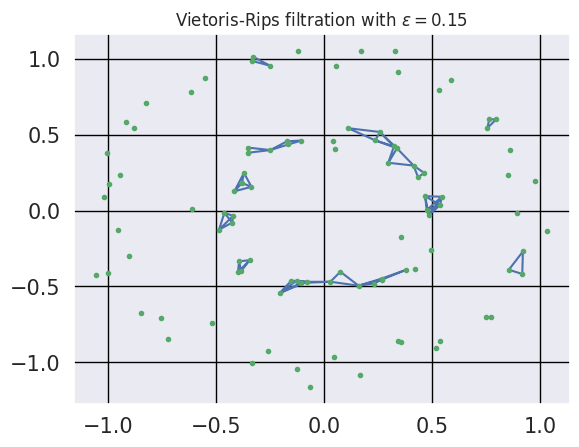

In [8]:

plt.triplot(circles[:,0], circles[:,1], triangles)
plt.plot(circles[:,0], circles[:,1], '.')
plt.title("Vietoris-Rips filtration with $\epsilon=0.15$")
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('filtration15.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

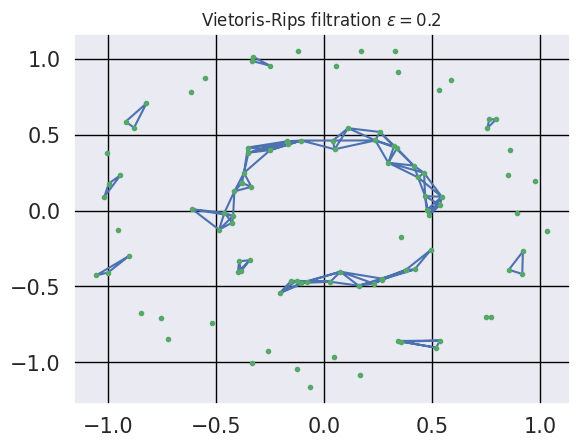

In [13]:
eps = 0.2
triangles = np.array([s[0] for s in Rips_simplex_tree.get_skeleton(2) if len(s[0])==3 and s[1] <= eps])
plt.triplot(circles[:,0], circles[:,1], triangles)
plt.plot(circles[:,0], circles[:,1], '.')
plt.title("Vietoris-Rips filtration $\epsilon=0.2$")
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('filtration2.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

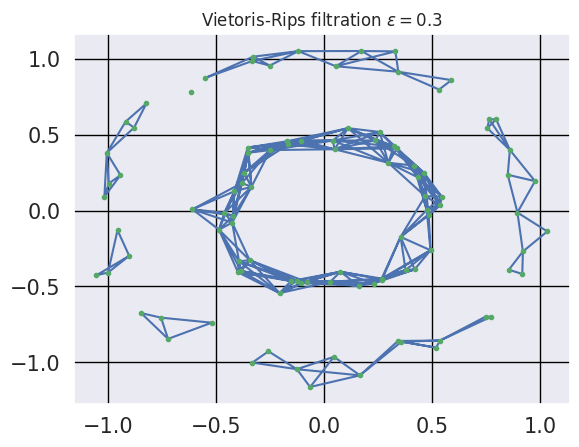

In [14]:
eps = 0.3
triangles = np.array([s[0] for s in Rips_simplex_tree.get_skeleton(2) if len(s[0])==3 and s[1] <= eps])
plt.triplot(circles[:,0], circles[:,1], triangles)
plt.plot(circles[:,0], circles[:,1], '.')
plt.title("Vietoris-Rips filtration $\epsilon=0.3$")
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('filtration3.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [9]:
%%time
# We can compute persistence on the simplex tree structure using the persistence() method
diag_Rips = Rips_simplex_tree.persistence()

CPU times: user 3.67 ms, sys: 0 ns, total: 3.67 ms
Wall time: 3.24 ms


usetex mode requires dvipng.


CPU times: user 949 ms, sys: 1.7 s, total: 2.65 s
Wall time: 550 ms


(array([-0.1       ,  0.        ,  0.1       ,  0.2       ,  0.3       ,
         0.4       ,  0.5       ,  0.6       ,  0.64927001]),
 [Text(0, -0.1, '-0.100'),
  Text(0, 0.0, '0.000'),
  Text(0, 0.1, '0.100'),
  Text(0, 0.20000000000000004, '0.200'),
  Text(0, 0.30000000000000004, '0.300'),
  Text(0, 0.4, '0.400'),
  Text(0, 0.5000000000000001, '0.500'),
  Text(0, 0.6000000000000001, '0.600'),
  Text(0, 0.6492700116453639, '$+\\infty$')])

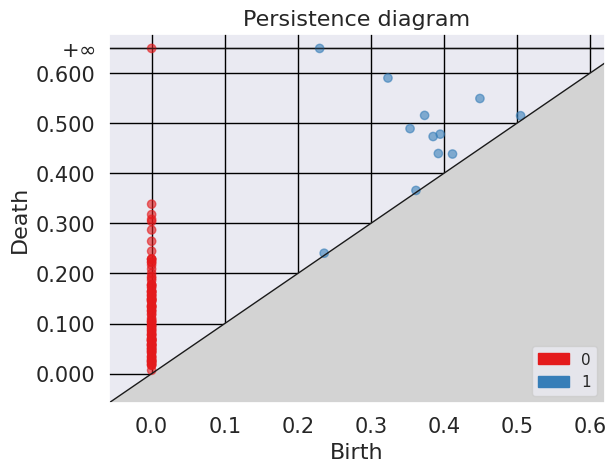

In [10]:
%%time
gd.plot_persistence_diagram(diag_Rips,legend=True)
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('persitencediagramCircles.png' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)

CPU times: user 494 ms, sys: 150 ms, total: 644 ms
Wall time: 440 ms


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

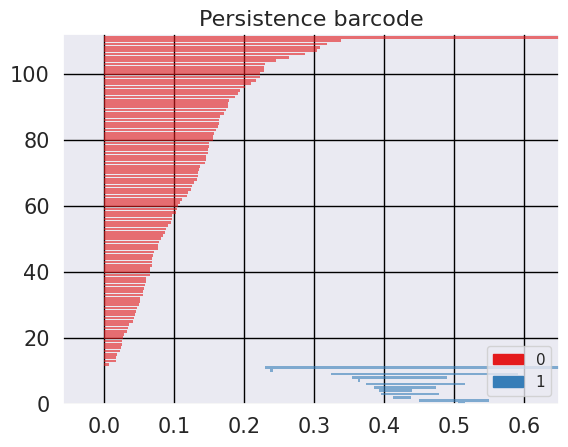

In [12]:
%%time
gd.plot_persistence_barcode(diag_Rips,legend=True)
plt.grid(color = 'black', linestyle = '-', linewidth = 1)
plt.savefig('persistencebarcodeCircles' , dpi=600, transparent=True)
plt.xticks(size=15)
plt.yticks(size=15)
